# Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

Using visualizations, we can start to explore questions from the dataset like:

* **Do students in more popular majors make more money?**

* **How many majors are predominantly male? Predominantly female?**

* **Which category of majors have the most students?**


In [1]:
#setting up the environment

import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")


In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis = 0)
    
cleaned_data_count = recent_grads.shape[0]
    
print(raw_data_count)
print(cleaned_data_count)

173
172


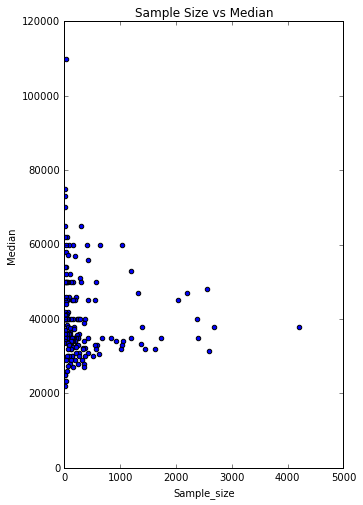

In [5]:
#Sample size and median

sample_med = recent_grads.plot(x = "Sample_size", 
                               y = "Median", kind = "scatter", 
                               xlim = (0, 5000),
                               title = "Sample Size vs Median", 
                               figsize = (5, 8))

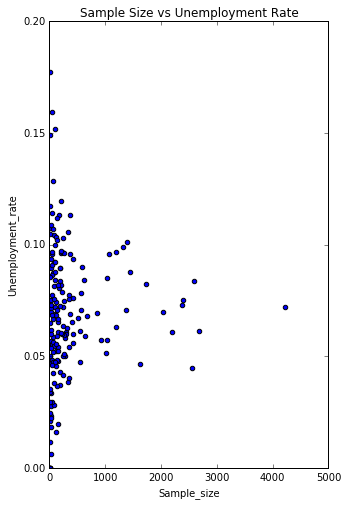

In [6]:
#Sample size and unemployment rate

sample_unemp = recent_grads.plot(x = "Sample_size", 
                               y = "Unemployment_rate", 
                               kind = "scatter", 
                               xlim = (0, 5000), ylim = (0, 0.20),
                               title = "Sample Size vs Unemployment Rate", 
                               figsize = (5, 8))

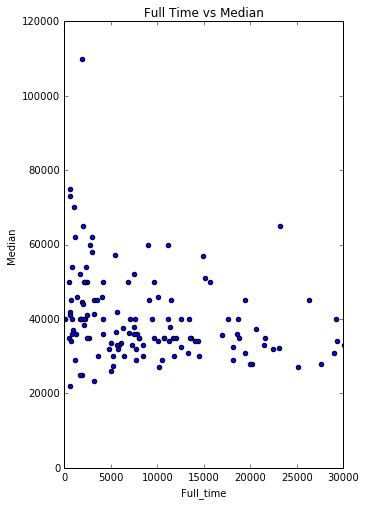

In [7]:
#Full_time and Median

ft_med = recent_grads.plot(x = "Full_time", 
                               y = "Median", 
                               kind = "scatter", xlim = (0, 30000),
                               title = "Full Time vs Median", 
                               figsize = (5, 8))

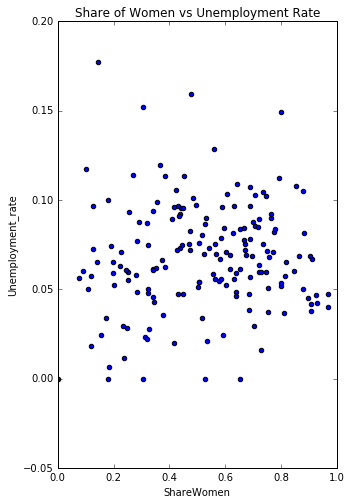

In [8]:
#Share of Women and Unemployment rate

sharewomen_unemp = recent_grads.plot(x = "ShareWomen", 
                               y = "Unemployment_rate", 
                               kind = "scatter", 
                               xlim = (0, 1),
                               title = "Share of Women vs Unemployment Rate", 
                               figsize = (5, 8))

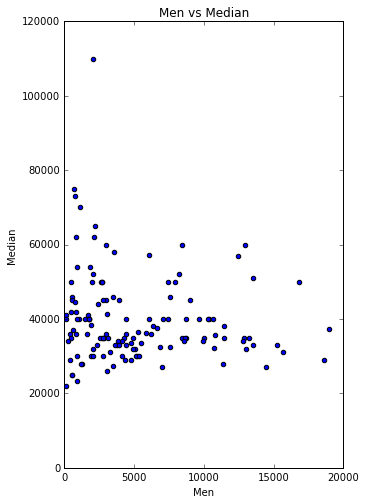

In [9]:
#Men and median

men_med = recent_grads.plot(x = "Men", 
                               y = "Median", 
                               kind = "scatter", 
                               xlim = (0, 20000),
                               title = "Men vs Median", 
                               figsize = (5, 8))

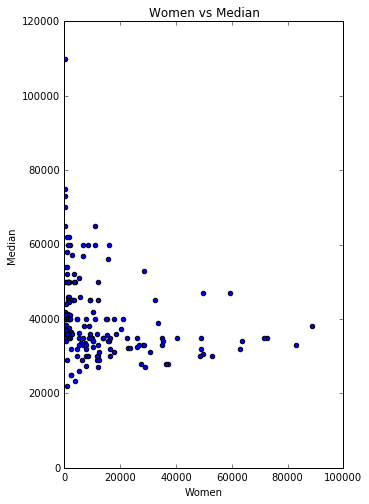

In [10]:
#Women and median

women_med = recent_grads.plot(x = "Women", 
                               y = "Median", 
                               kind = "scatter", 
                               xlim = (0, 100000),
                               title = "Women vs Median", 
                               figsize = (5, 8))

### Observations from the scatter plots

* No correlation between percentage of women studying a major and the median wage

* For women and men, most median wage by major ranges between 20000 and 40000.

* Popular majors do not necessarily lead to higher median wages

* No link between number of full time employees and median salary.

### Histograms

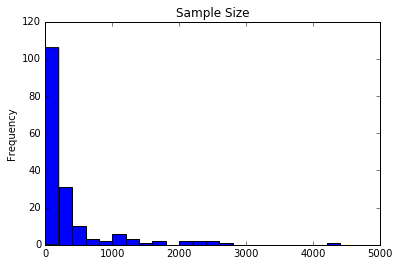

In [21]:
#Sample size

recent_grads["Sample_size"].plot(kind = 'hist', 
                                 bins=25, range=(0,5000), 
                                 title = "Sample Size")

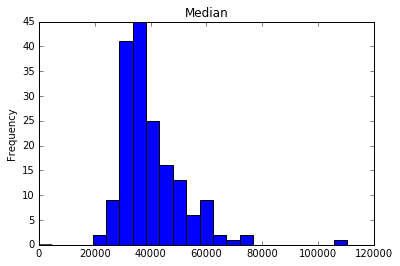

In [28]:
#Median

recent_grads["Median"].plot(kind = 'hist', 
                                 bins=25, range=(0,120000), 
                                 title = "Median")

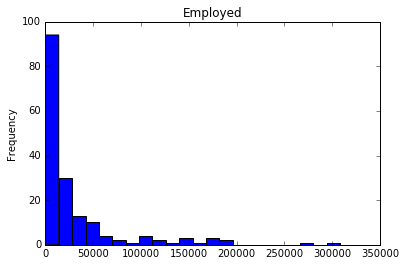

In [35]:
#Employed

recent_grads["Employed"].plot(kind = 'hist', 
                                 bins=25, range=(0,350000), 
                                 title = "Employed")

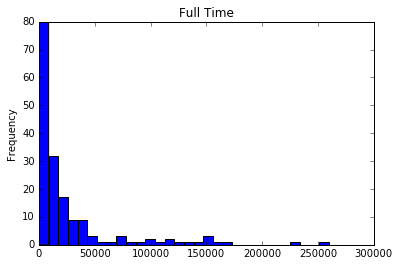

In [39]:
#Full time

recent_grads["Full_time"].plot(kind = 'hist', 
                                 bins=30, range=(0,260000), 
                                 title = "Full Time")

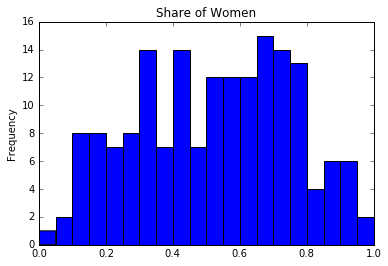

In [41]:
#Share of Women

recent_grads["ShareWomen"].plot(kind = 'hist', 
                                 bins=20, range=(0,1), 
                                 title = "Share of Women")

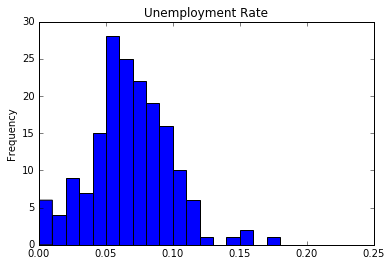

In [43]:
#Unemployment_rate

recent_grads["Unemployment_rate"].plot(kind = 'hist', 
                                 bins=20, range=(0,0.2), 
                                 title = "Unemployment Rate")

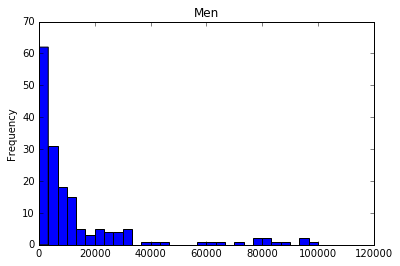

In [47]:
#Men

recent_grads["Men"].plot(kind = 'hist', 
                                 bins=30, range=(0,100000), 
                                 title = "Men")

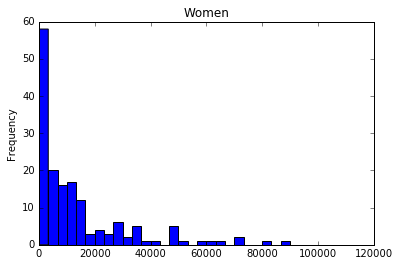

In [48]:
#Women

recent_grads["Women"].plot(kind = 'hist', 
                                 bins=30, range=(0,100000), 
                                 title = "Women")

### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fbd120cf8>,
      dtype=object)

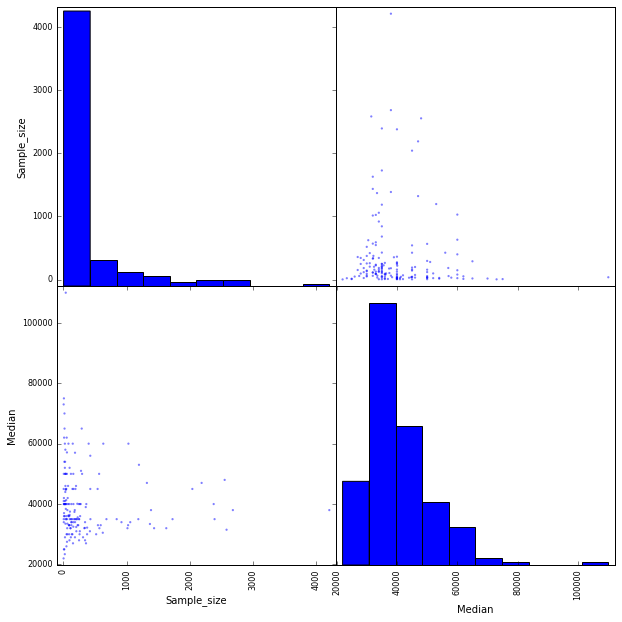

In [52]:
from pandas.plotting import scatter_matrix as sm

#SAMPLE SIZE and MEDIAN

sm(recent_grads[["Sample_size", "Median"]], figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fbd0a66a0>,
      dtype=object)

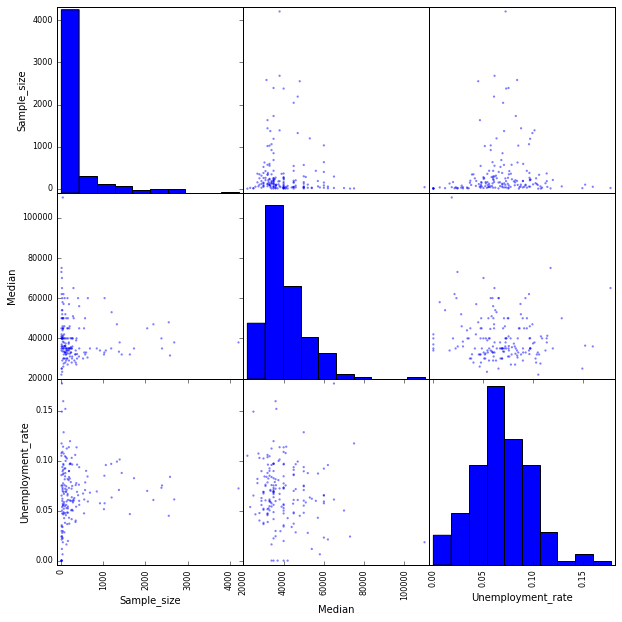

In [53]:
#SAMPLE SIZE, MEDIAN and UNEMPLOYMENT RATE

sm(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize = (10,10))

### Bar graphs

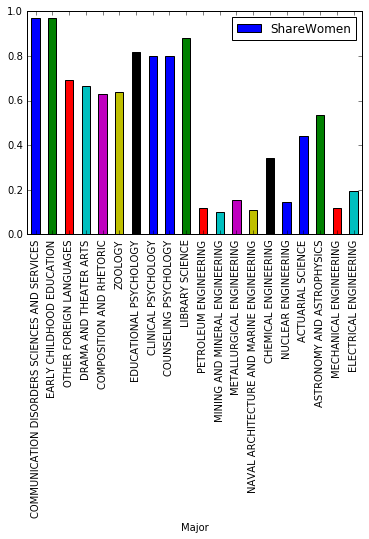

In [93]:
recent_grads[-10:].append(recent_grads[:10]).plot.bar(x='Major', y='ShareWomen')

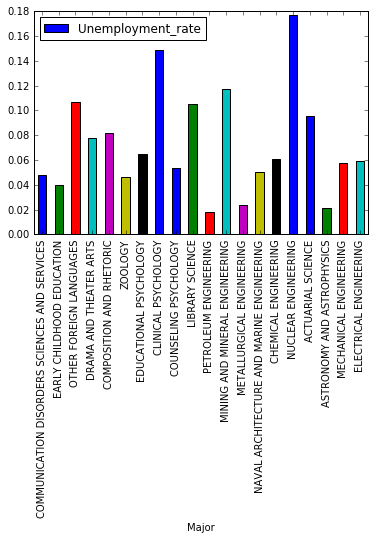

In [91]:
recent_grads[-10:].append(recent_grads[:10]).plot.bar(x='Major', y='Unemployment_rate')

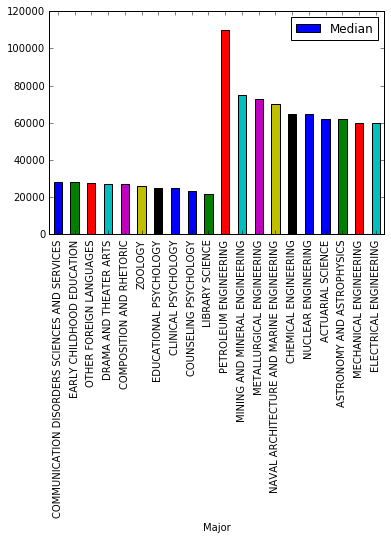

In [94]:
recent_grads[-10:].append(recent_grads[:10]).plot.bar(x='Major', y='Median')






### Observations from bar charts
* Much higher share of women doing the first ten majors
* Much lower median income from the first ten majors
* Engineering pays really well
* No clear patterns in unemployment rate by major. Needs further grouping/ research.